# WK7 Data  Visualization<hr style="border:2.5px solid #126782"></hr>
<br>

### **Name** : Tonie Eduard Deocampo 

### **Course** : BSCpE - 2A

In [187]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [188]:
df = pd.read_csv(r"/Users/tonieeduarddeocampo/Documents/tonie_matheda/WK8/raw/chip-dataset-cleaned.csv",
                 delimiter=",")
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4854 entries, 0 to 4853
Data columns (total 13 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Product       4854 non-null   object 
 1   Type          4854 non-null   object 
 2   Date          4854 non-null   object 
 3   Process_Size  4854 non-null   float64
 4   TDP           4854 non-null   float64
 5   Die_Size      4854 non-null   float64
 6   Transistors   4854 non-null   float64
 7   Frequency     4854 non-null   int64  
 8   Foundry       4854 non-null   object 
 9   Vendor        4854 non-null   object 
 10  FP16          536 non-null    float64
 11  FP32          1948 non-null   float64
 12  FP64          1306 non-null   float64
dtypes: float64(7), int64(1), object(5)
memory usage: 493.1+ KB


In [189]:
df_w = df.copy()

In [190]:
df = df.drop(df.columns[[10,11,12]], axis = 1)
df.head()

,Product,Type,Date,Process_Size,TDP,Die_Size,Transistors,Frequency,Foundry,Vendor
0,AMD Athlon 64 3500+,CPU,2/20/2007,65.0,45.0,77.000000,122.000000,2200,Unknown,AMD
1,AMD Athlon 200GE,CPU,9/6/2018,14.0,35.0,192.000000,4800.000000,3200,Unknown,AMD
2,Intel Core i5-1145G7,CPU,9/2/2020,10.0,28.0,188.440445,1929.922279,2600,Intel,Intel
3,Intel Xeon E5-2603 v2,CPU,9/1/2013,22.0,80.0,160.000000,1400.000000,1800,Intel,Intel
4,AMD Phenom II X4 980 BE,CPU,5/3/2011,45.0,125.0,258.000000,758.000000,3700,Unknown,AMD


## Number of CPU and GPU produced by all the vendors

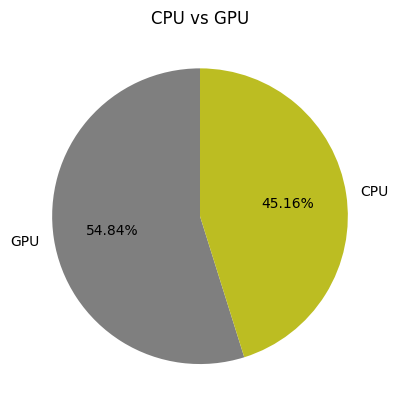

In [191]:
import matplotlib.pyplot as plt

type_counts = df['Type'].value_counts()
type_colors = {'CPU': '#bcbd22', 'GPU': '#7f7f7f'}
valid_labels = [t for t in type_counts.index if t in type_colors]
filtered_counts = type_counts.loc[valid_labels]
filtered_colors = [type_colors[t] for t in valid_labels]
plt.pie(filtered_counts, labels=valid_labels, autopct='%1.2f%%', startangle=90, colors=filtered_colors)
plt.title('CPU vs GPU')
plt.show()


## Number of all the CPU and GPU by specific vendors

<Axes: xlabel='Vendor'>

<Figure size 1200x600 with 0 Axes>

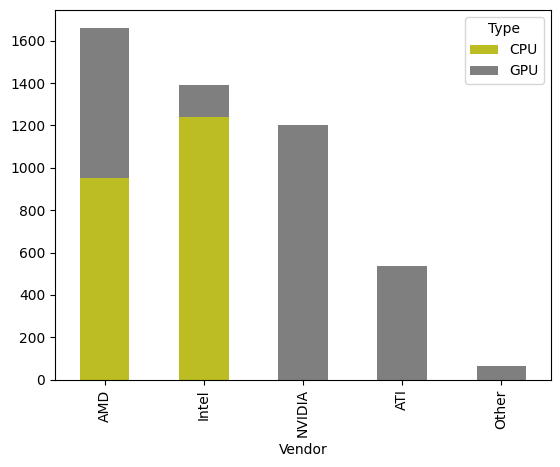

In [192]:
stacked_data = df.groupby(["Vendor", "Type"]).size().unstack()
plt.figure(figsize=(12, 6))
brand_order = ['AMD','Intel','NVIDIA','ATI','Other']
stacked_data = stacked_data.loc[brand_order]
type_colors = {'CPU': '#bcbd22', 'GPU': '#7f7f7f'}
stacked_data.plot(kind="bar", stacked=True,color=type_colors)

## Process Size Trend


## GPU

In [340]:
df_ps = df_w[['Type','Date','Process_Size']].where(df_w['Type']=='GPU').dropna()
df_ps

,Type,Date,Process_Size
2192,GPU,4/3/2011,32.0
2193,GPU,6/25/2002,150.0
2194,GPU,2/23/2019,14.0
2195,GPU,3/2/2008,130.0
2196,GPU,9/30/2008,55.0
...,...,...,...
4849,GPU,2/22/2011,40.0
4850,GPU,6/1/2005,90.0
4851,GPU,3/3/2010,40.0
4852,GPU,3/6/2003,150.0


In [341]:
df_ps['Date'] = pd.to_datetime(df_ps['Date'])
df_ps['Year'] = df_ps['Date'].dt.year
df_ps 

,Type,Date,Process_Size,Year
2192,GPU,2011-04-03,32.0,2011.0
2193,GPU,2002-06-25,150.0,2002.0
2194,GPU,2019-02-23,14.0,2019.0
2195,GPU,2008-03-02,130.0,2008.0
2196,GPU,2008-09-30,55.0,2008.0
...,...,...,...,...
4849,GPU,2011-02-22,40.0,2011.0
4850,GPU,2005-06-01,90.0,2005.0
4851,GPU,2010-03-03,40.0,2010.0
4852,GPU,2003-03-06,150.0,2003.0


In [343]:
df_ps = df_ps.groupby('Year')['Process_Size'].mean().reset_index()
df_ps

,Year,Process_Size
0,2000.0,180.673973
1,2001.0,162.757339
2,2002.0,153.913043
3,2003.0,140.982143
4,2004.0,121.384615
5,2005.0,112.315789
6,2006.0,93.178295
7,2007.0,80.031646
8,2008.0,63.439306
9,2009.0,52.785087


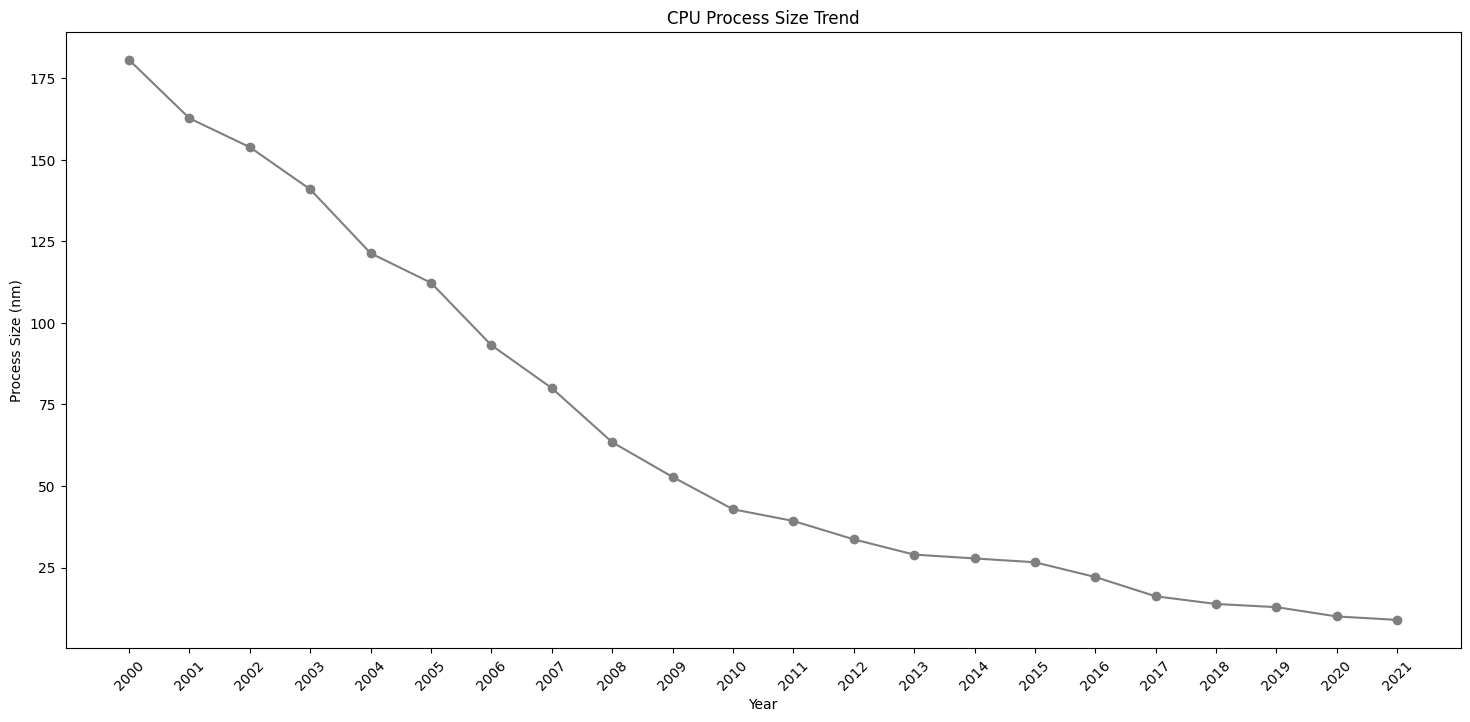

In [346]:
plt.figure(figsize=(18, 8))
plt.plot(df_ps['Year'], df_ps['Process_Size'], marker='o', linestyle='-', color = '#7f7f7f')
plt.xticks(df_ps['Year'], rotation=45)
plt.title('CPU Process Size Trend') 
plt.xlabel('Year')
plt.ylabel('Process Size (nm)')
plt.show()

## CPU

In [347]:
df_ps = df_w[['Type','Date','Process_Size']].where(df_w['Type']=='CPU').dropna()
df_ps

,Type,Date,Process_Size
0,CPU,2/20/2007,65.0
1,CPU,9/6/2018,14.0
2,CPU,9/2/2020,10.0
3,CPU,9/1/2013,22.0
4,CPU,5/3/2011,45.0
...,...,...,...
2187,CPU,4/6/2021,10.0
2188,CPU,3/16/2020,7.0
2189,CPU,7/1/2007,65.0
2190,CPU,12/1/2004,90.0


In [348]:
df_ps['Date'] = pd.to_datetime(df_ps['Date'])
df_ps['Year'] = df_ps['Date'].dt.year
df_ps 

,Type,Date,Process_Size,Year
0,CPU,2007-02-20,65.0,2007.0
1,CPU,2018-09-06,14.0,2018.0
2,CPU,2020-09-02,10.0,2020.0
3,CPU,2013-09-01,22.0,2013.0
4,CPU,2011-05-03,45.0,2011.0
...,...,...,...,...
2187,CPU,2021-04-06,10.0,2021.0
2188,CPU,2020-03-16,7.0,2020.0
2189,CPU,2007-07-01,65.0,2007.0
2190,CPU,2004-12-01,90.0,2004.0


In [349]:
df_ps = df_ps.groupby('Year')['Process_Size'].mean().reset_index()
df_ps

,Year,Process_Size
0,2000.0,180.000000
1,2001.0,137.790698
2,2002.0,132.564103
3,2003.0,130.000000
4,2004.0,109.705882
5,2005.0,92.954545
6,2006.0,75.925926
7,2007.0,70.869565
8,2008.0,58.571429
9,2009.0,45.913043


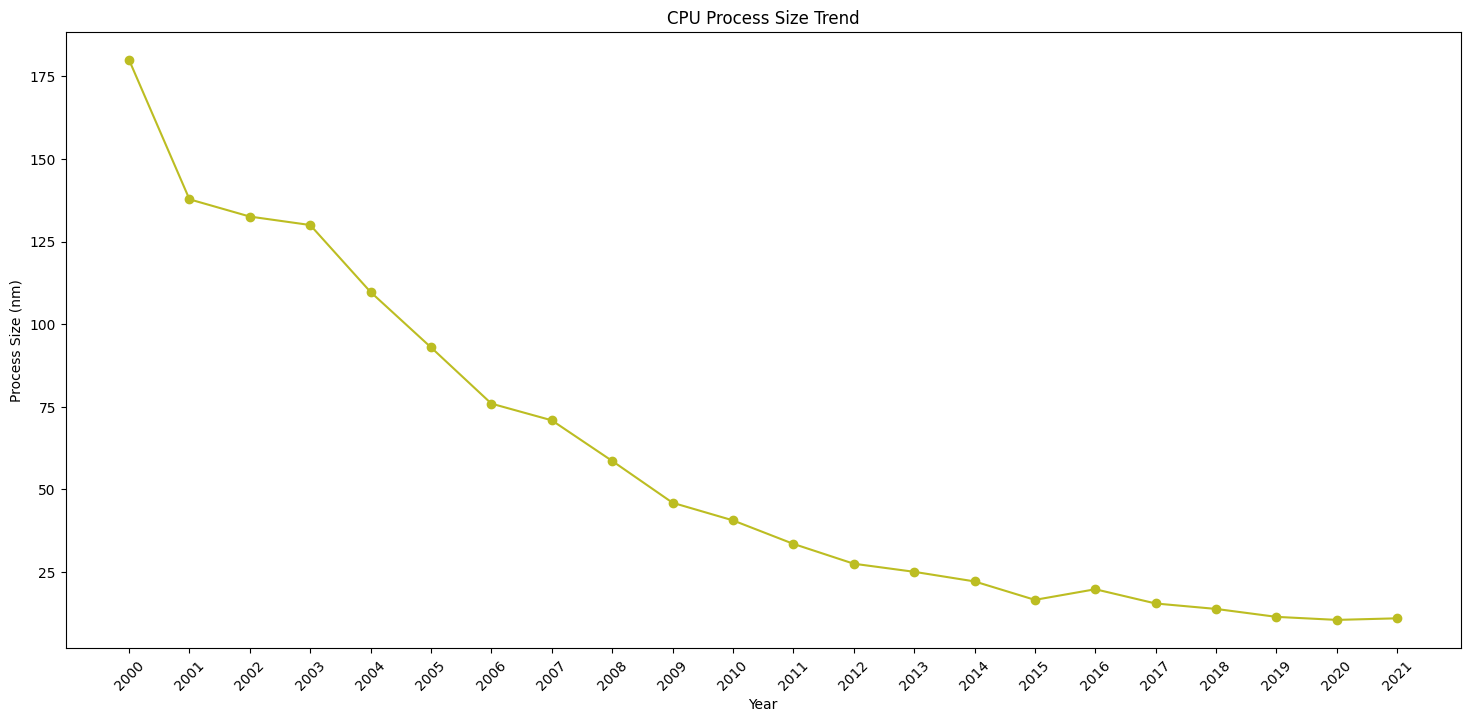

In [351]:
plt.figure(figsize=(18, 8))
plt.plot(df_ps['Year'], df_ps['Process_Size'], marker='o', linestyle='-', color = '#bcbd22')
plt.xticks(df_ps['Year'], rotation=45)
plt.title('CPU Process Size Trend') 
plt.xlabel('Year')
plt.ylabel('Process Size (nm)')
plt.show()

# Die Size Trend

## GPU

In [317]:
df_ds= df_w[['Type', 'Date','Die_Size']].where(df_w['Type'] == 'GPU').dropna()
df_ds

,Type,Date,Die_Size
2192,GPU,4/3/2011,216.000000
2193,GPU,6/25/2002,174.000000
2194,GPU,2/23/2019,132.000000
2195,GPU,3/2/2008,188.440445
2196,GPU,9/30/2008,73.000000
...,...,...,...
4849,GPU,2/22/2011,332.000000
4850,GPU,6/1/2005,188.440445
4851,GPU,3/3/2010,100.000000
4852,GPU,3/6/2003,65.000000


In [318]:
df_ds['Date'] = pd.to_datetime(df_ds['Date'])
df_ds['Year'] = df_ds['Date'].dt.year
df_ds

,Type,Date,Die_Size,Year
2192,GPU,2011-04-03,216.000000,2011.0
2193,GPU,2002-06-25,174.000000,2002.0
2194,GPU,2019-02-23,132.000000,2019.0
2195,GPU,2008-03-02,188.440445,2008.0
2196,GPU,2008-09-30,73.000000,2008.0
...,...,...,...,...
4849,GPU,2011-02-22,332.000000,2011.0
4850,GPU,2005-06-01,188.440445,2005.0
4851,GPU,2010-03-03,100.000000,2010.0
4852,GPU,2003-03-06,65.000000,2003.0


In [319]:
df_ds = df_ds.groupby('Year')['Die_Size'].max().reset_index()
df_ds


,Year,Die_Size
0,2000.0,279.000000
1,2001.0,188.440445
2,2002.0,215.000000
3,2003.0,218.000000
4,2004.0,297.000000
5,2005.0,333.000000
6,2006.0,484.000000
7,2007.0,484.000000
8,2008.0,576.000000
9,2009.0,470.000000


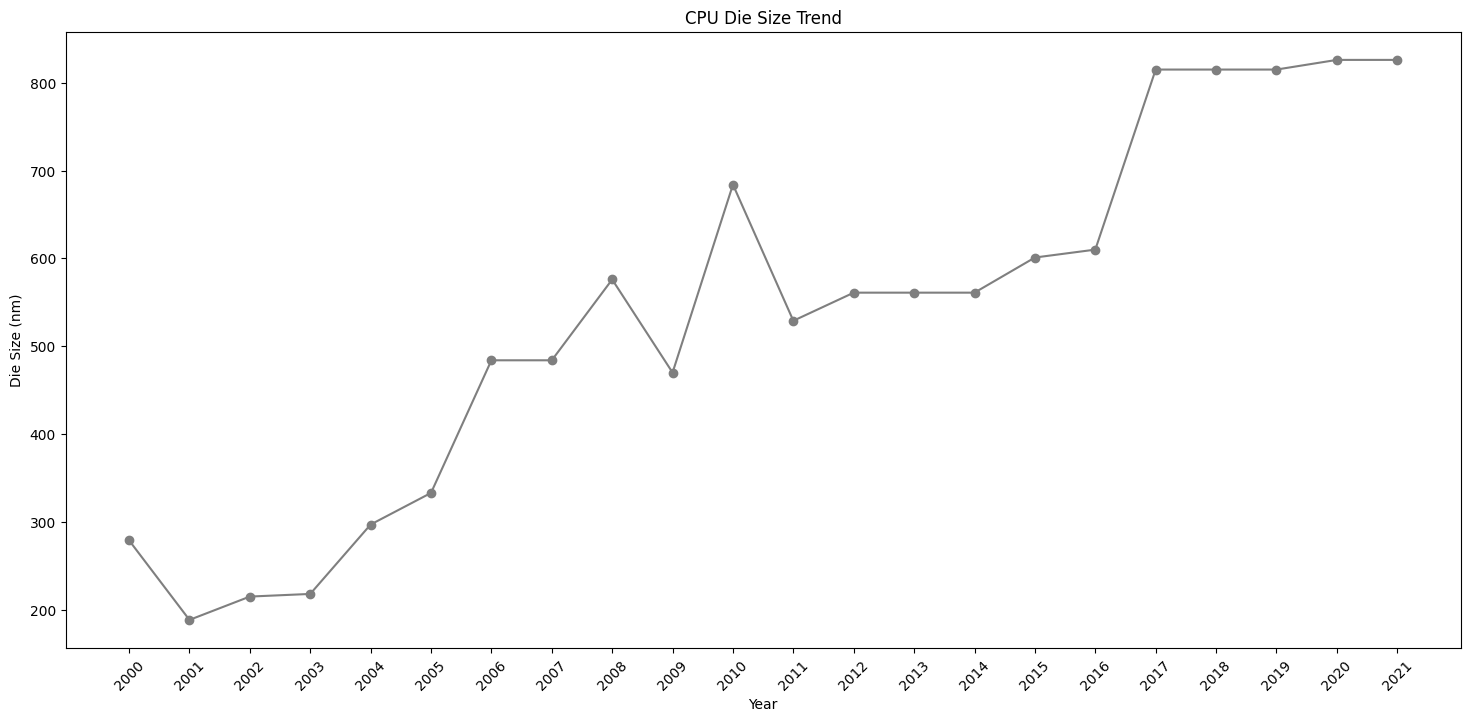

In [353]:

plt.figure(figsize=(18, 8))
plt.plot(df_ds['Year'], df_ds['Die_Size'], marker='o', linestyle='-', color = '#7f7f7f')
plt.xticks(df_ds['Year'], rotation=45)
plt.title('GPU Die Size Trend')
plt.xlabel('Year')
plt.ylabel('Die Size (nm)')
plt.show()


## CPU

In [197]:
df_ds= df_w[['Type', 'Date','Die_Size']].where(df_w['Type'] == 'CPU').dropna()
df_ds

,Type,Date,Die_Size
0,CPU,2/20/2007,77.000000
1,CPU,9/6/2018,192.000000
2,CPU,9/2/2020,188.440445
3,CPU,9/1/2013,160.000000
4,CPU,5/3/2011,258.000000
...,...,...,...
2187,CPU,4/6/2021,188.440445
2188,CPU,3/16/2020,156.000000
2189,CPU,7/1/2007,143.000000
2190,CPU,12/1/2004,188.440445


In [198]:
df_ds['Date'] = pd.to_datetime(df_ds['Date'])
df_ds['Year'] = df_ds['Date'].dt.year
df_ds

,Type,Date,Die_Size,Year
0,CPU,2007-02-20,77.000000,2007.0
1,CPU,2018-09-06,192.000000,2018.0
2,CPU,2020-09-02,188.440445,2020.0
3,CPU,2013-09-01,160.000000,2013.0
4,CPU,2011-05-03,258.000000,2011.0
...,...,...,...,...
2187,CPU,2021-04-06,188.440445,2021.0
2188,CPU,2020-03-16,156.000000,2020.0
2189,CPU,2007-07-01,143.000000,2007.0
2190,CPU,2004-12-01,188.440445,2004.0


In [199]:
df_ds = df_ds.groupby('Year')['Die_Size'].mean().reset_index()
df_ds

,Year,Die_Size
0,2000.0,129.058824
1,2001.0,124.872093
2,2002.0,130.641026
3,2003.0,168.835123
4,2004.0,148.858889
5,2005.0,155.710329
6,2006.0,172.474156
7,2007.0,134.437713
8,2008.0,163.509349
9,2009.0,185.695652


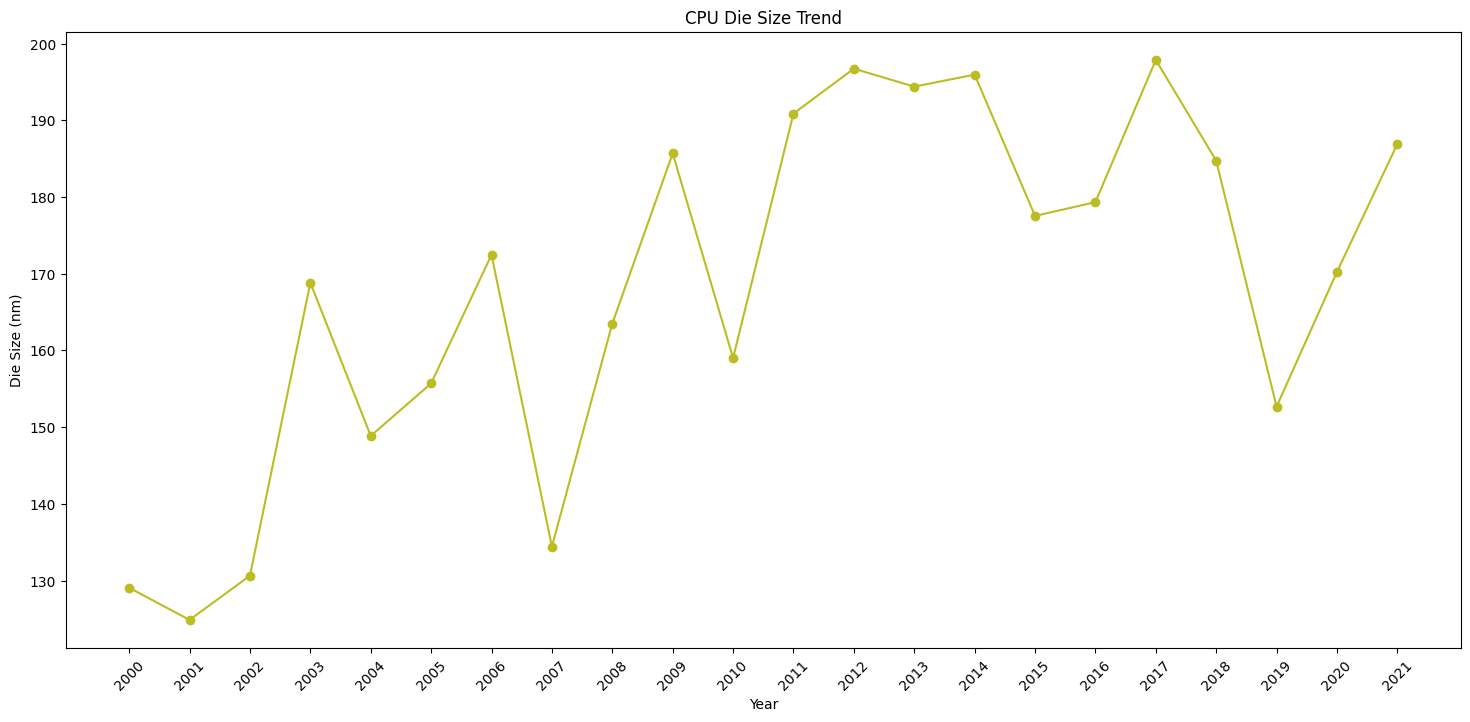

In [200]:
import matplotlib.pyplot as plt

plt.figure(figsize=(18, 8))
plt.plot(df_ds['Year'], df_ds['Die_Size'], marker='o', linestyle='-', color = '#bcbd22')
plt.xticks(df_ds['Year'], rotation=45)
plt.title('CPU Die Size Trend')
plt.xlabel('Year')
plt.ylabel('Die Size (nm)')
plt.show()


# Transistors

## GPU

In [321]:
df_t= df_w[['Type', 'Date','Transistors']].where(df_w['Type'] == 'GPU').dropna()
df_t

,Type,Date,Transistors
2192,GPU,4/3/2011,1160.000000
2193,GPU,6/25/2002,80.000000
2194,GPU,2/23/2019,3300.000000
2195,GPU,3/2/2008,1929.922279
2196,GPU,9/30/2008,242.000000
...,...,...,...
4849,GPU,2/22/2011,1950.000000
4850,GPU,6/1/2005,1929.922279
4851,GPU,3/3/2010,486.000000
4852,GPU,3/6/2003,29.000000


In [322]:
df_t['Date'] = pd.to_datetime(df_t['Date'])
df_t['Year'] = df_t['Date'].dt.year
df_t

,Type,Date,Transistors,Year
2192,GPU,2011-04-03,1160.000000,2011.0
2193,GPU,2002-06-25,80.000000,2002.0
2194,GPU,2019-02-23,3300.000000,2019.0
2195,GPU,2008-03-02,1929.922279,2008.0
2196,GPU,2008-09-30,242.000000,2008.0
...,...,...,...,...
4849,GPU,2011-02-22,1950.000000,2011.0
4850,GPU,2005-06-01,1929.922279,2005.0
4851,GPU,2010-03-03,486.000000,2010.0
4852,GPU,2003-03-06,29.000000,2003.0


In [323]:
df_t = df_t.groupby('Year')['Transistors'].max().reset_index()
df_t


,Year,Transistors
0,2000.0,1929.922279
1,2001.0,1929.922279
2,2002.0,1929.922279
3,2003.0,1929.922279
4,2004.0,1929.922279
5,2005.0,1929.922279
6,2006.0,1929.922279
7,2007.0,1929.922279
8,2008.0,1929.922279
9,2009.0,2154.000000


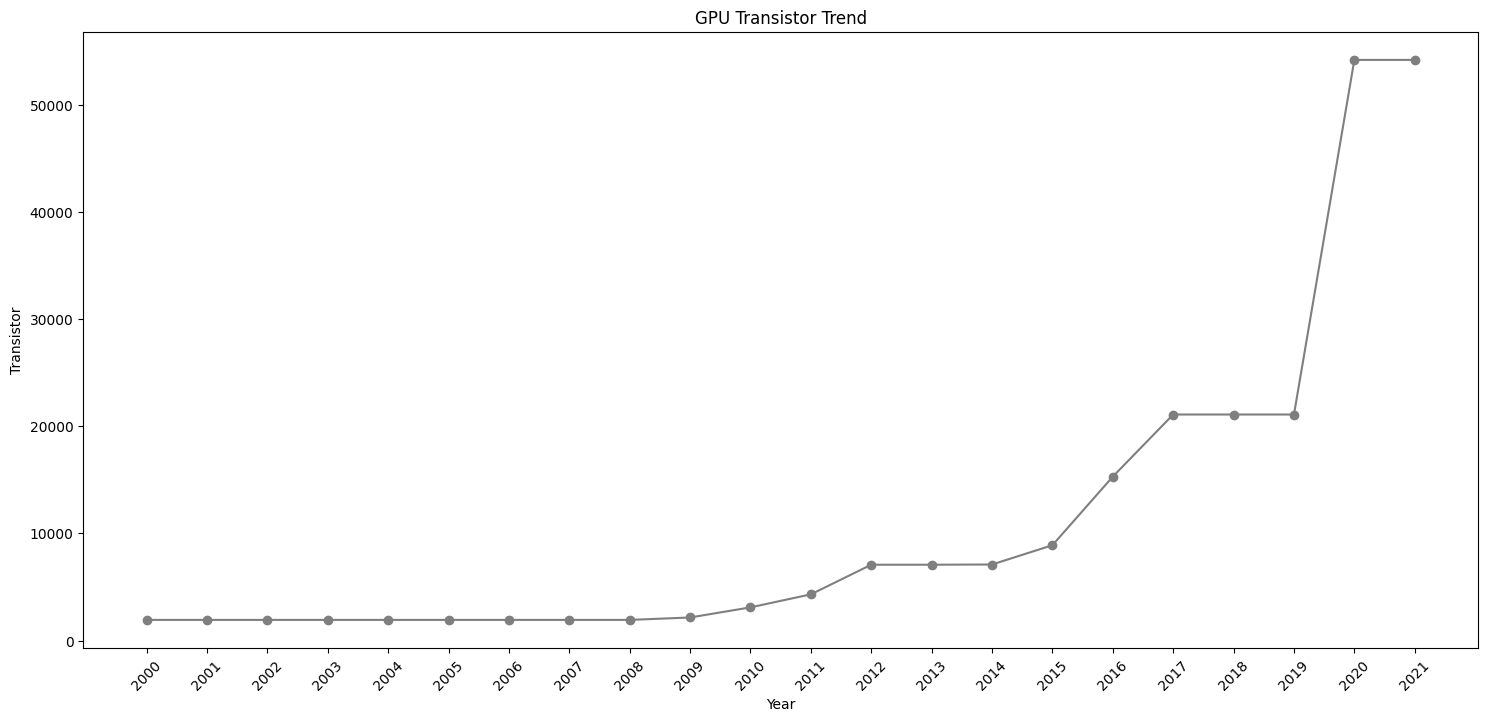

In [324]:
import matplotlib.pyplot as plt

plt.figure(figsize=(18, 8))
plt.plot(df_t['Year'], df_t['Transistors'], marker='o', linestyle='-', color = '#7f7f7f')
plt.xticks(df_t['Year'], rotation=45)
plt.title('GPU Transistor Trend')
plt.xlabel('Year')
plt.ylabel('Transistor')
plt.show()


## CPU

In [205]:
df_t= df_w[['Type', 'Date','Transistors']].where(df_w['Type'] == 'CPU').dropna()
df_t

,Type,Date,Transistors
0,CPU,2/20/2007,122.000000
1,CPU,9/6/2018,4800.000000
2,CPU,9/2/2020,1929.922279
3,CPU,9/1/2013,1400.000000
4,CPU,5/3/2011,758.000000
...,...,...,...
2187,CPU,4/6/2021,1929.922279
2188,CPU,3/16/2020,9800.000000
2189,CPU,7/1/2007,291.000000
2190,CPU,12/1/2004,106.000000


In [206]:
df_t['Date'] = pd.to_datetime(df_t['Date'])
df_t['Year'] = df_t['Date'].dt.year
df_t

,Type,Date,Transistors,Year
0,CPU,2007-02-20,122.000000,2007.0
1,CPU,2018-09-06,4800.000000,2018.0
2,CPU,2020-09-02,1929.922279,2020.0
3,CPU,2013-09-01,1400.000000,2013.0
4,CPU,2011-05-03,758.000000,2011.0
...,...,...,...,...
2187,CPU,2021-04-06,1929.922279,2021.0
2188,CPU,2020-03-16,9800.000000,2020.0
2189,CPU,2007-07-01,291.000000,2007.0
2190,CPU,2004-12-01,106.000000,2004.0


In [207]:
df_t = df_t.groupby('Year')['Transistors'].max().reset_index()
df_t

,Year,Transistors
0,2000.0,44.000000
1,2001.0,233.000000
2,2002.0,125.000000
3,2003.0,286.000000
4,2004.0,286.000000
5,2005.0,1929.922279
6,2006.0,1929.922279
7,2007.0,1929.922279
8,2008.0,1929.922279
9,2009.0,820.000000


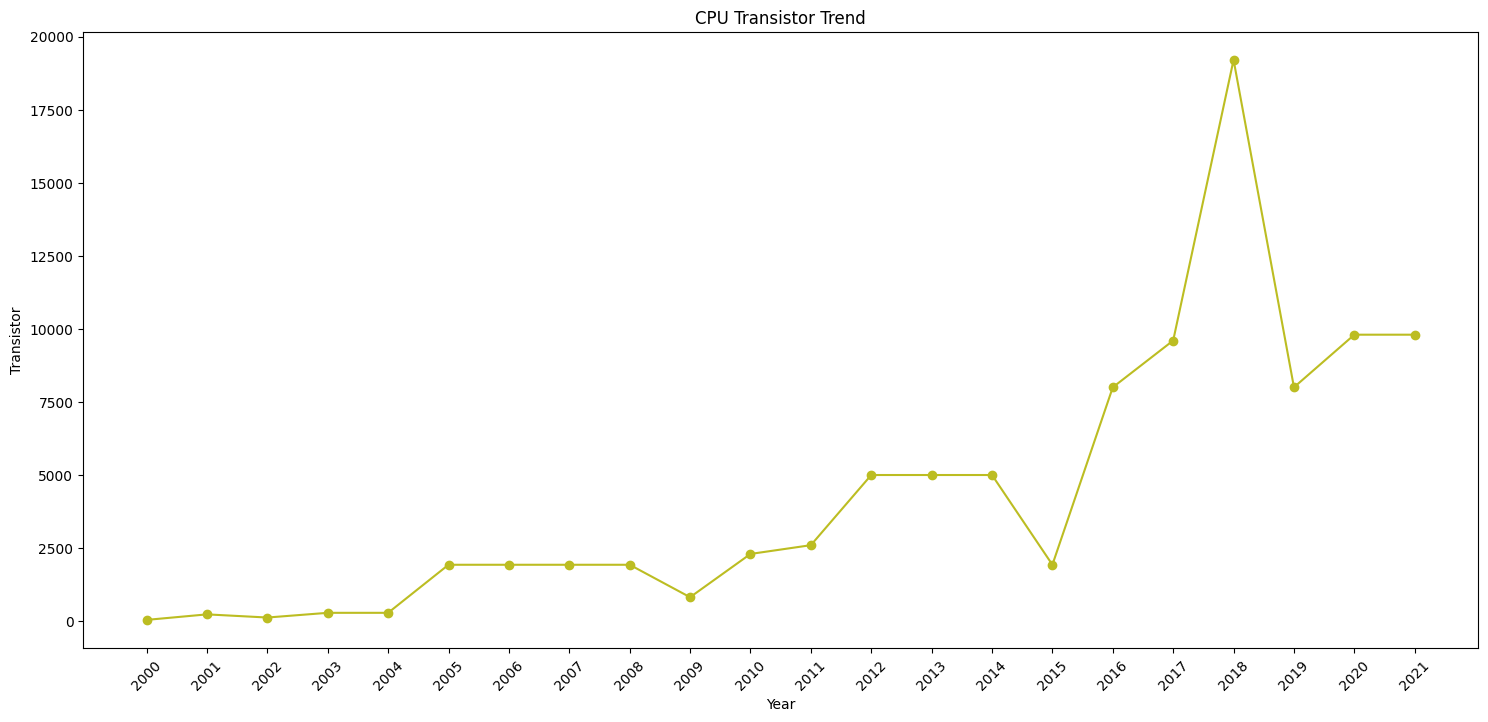

In [208]:
import matplotlib.pyplot as plt

plt.figure(figsize=(18, 8))
plt.plot(df_t['Year'], df_t['Transistors'], marker='o', linestyle='-', color = '#bcbd22')
plt.xticks(df_t['Year'], rotation=45)
plt.title('CPU Transistor Trend')
plt.xlabel('Year')
plt.ylabel('Transistor')
plt.show()

# Frequency

## GPU

In [325]:
df_f= df_w[['Type', 'Date','Frequency']].where(df_w['Type'] == 'GPU').dropna()
df_f

,Type,Date,Frequency
2192,GPU,4/3/2011,100.0
2193,GPU,6/25/2002,200.0
2194,GPU,2/23/2019,1469.0
2195,GPU,3/2/2008,200.0
2196,GPU,9/30/2008,600.0
...,...,...,...
4849,GPU,2/22/2011,450.0
4850,GPU,6/1/2005,250.0
4851,GPU,3/3/2010,500.0
4852,GPU,3/6/2003,250.0


In [326]:
df_f['Date'] = pd.to_datetime(df_f['Date'])
df_f['Year'] = df_f['Date'].dt.year
df_f

,Type,Date,Frequency,Year
2192,GPU,2011-04-03,100.0,2011.0
2193,GPU,2002-06-25,200.0,2002.0
2194,GPU,2019-02-23,1469.0,2019.0
2195,GPU,2008-03-02,200.0,2008.0
2196,GPU,2008-09-30,600.0,2008.0
...,...,...,...,...
4849,GPU,2011-02-22,450.0,2011.0
4850,GPU,2005-06-01,250.0,2005.0
4851,GPU,2010-03-03,500.0,2010.0
4852,GPU,2003-03-06,250.0,2003.0


In [327]:
df_f = df_f.groupby('Year')['Frequency'].max().reset_index()
df_f

,Year,Frequency
0,2000.0,250.0
1,2001.0,300.0
2,2002.0,325.0
3,2003.0,500.0
4,2004.0,540.0
5,2005.0,600.0
6,2006.0,667.0
7,2007.0,800.0
8,2008.0,825.0
9,2009.0,850.0


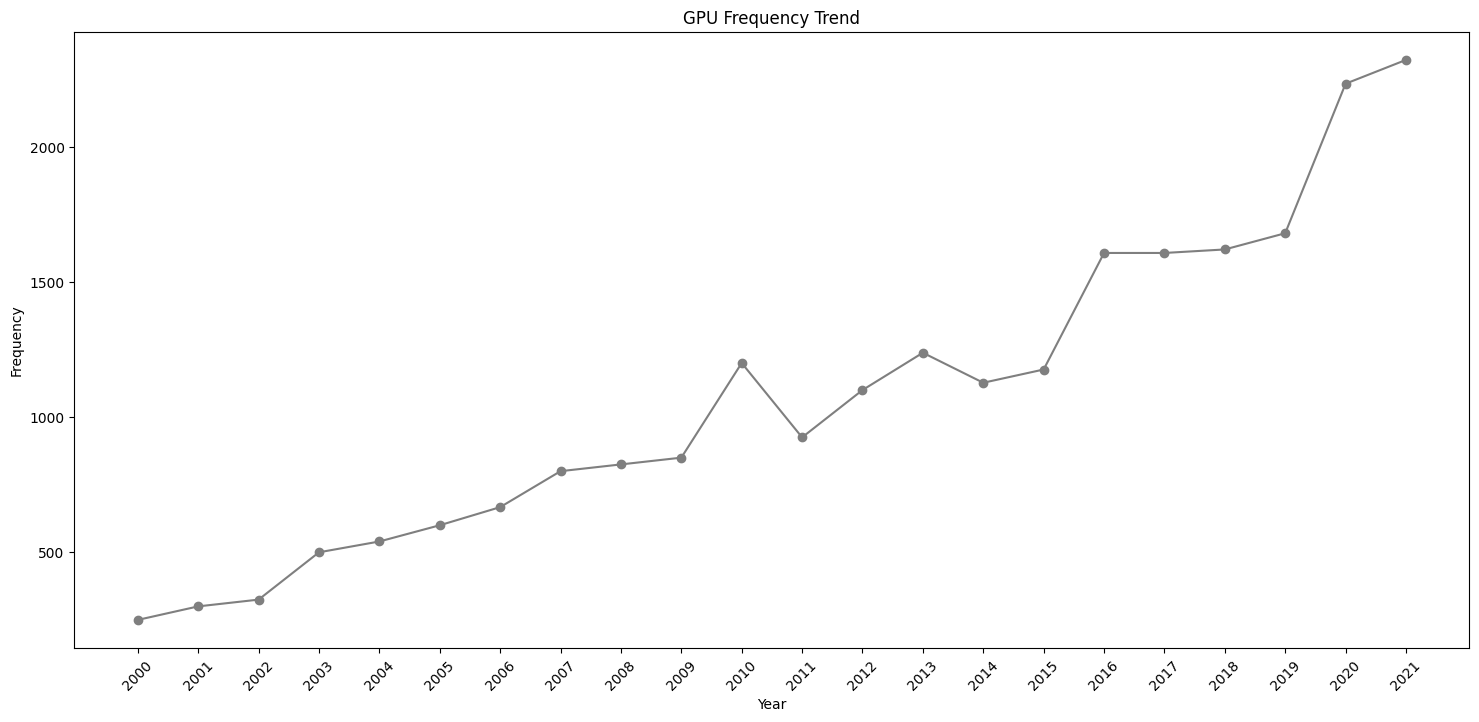

In [328]:
plt.figure(figsize=(18, 8))
plt.plot(df_f['Year'], df_f['Frequency'], marker='o', linestyle='-', color = '#7f7f7f')
plt.xticks(df_f['Year'], rotation=45)
plt.title('GPU Frequency Trend')
plt.xlabel('Year')
plt.ylabel('Frequency')
plt.show()

## CPU

In [227]:
df_f= df_w[['Type', 'Date','Frequency']].where(df_w['Type'] == 'CPU').dropna()
df_f

,Type,Date,Frequency
0,CPU,2/20/2007,2200.0
1,CPU,9/6/2018,3200.0
2,CPU,9/2/2020,2600.0
3,CPU,9/1/2013,1800.0
4,CPU,5/3/2011,3700.0
...,...,...,...
2187,CPU,4/6/2021,2400.0
2188,CPU,3/16/2020,3300.0
2189,CPU,7/1/2007,2333.0
2190,CPU,12/1/2004,2000.0


In [228]:
df_f['Date'] = pd.to_datetime(df_f['Date'])
df_f['Year'] = df_f['Date'].dt.year
df_f

,Type,Date,Frequency,Year
0,CPU,2007-02-20,2200.0,2007.0
1,CPU,2018-09-06,3200.0,2018.0
2,CPU,2020-09-02,2600.0,2020.0
3,CPU,2013-09-01,1800.0,2013.0
4,CPU,2011-05-03,3700.0,2011.0
...,...,...,...,...
2187,CPU,2021-04-06,2400.0,2021.0
2188,CPU,2020-03-16,3300.0,2020.0
2189,CPU,2007-07-01,2333.0,2007.0
2190,CPU,2004-12-01,2000.0,2004.0


In [229]:
df_f = df_f.groupby('Year')['Frequency'].max().reset_index()
df_f

,Year,Frequency
0,2000.0,1500.0
1,2001.0,3060.0
2,2002.0,2793.0
3,2003.0,3200.0
4,2004.0,3800.0
5,2005.0,3800.0
6,2006.0,3730.0
7,2007.0,3200.0
8,2008.0,3333.0
9,2009.0,3400.0


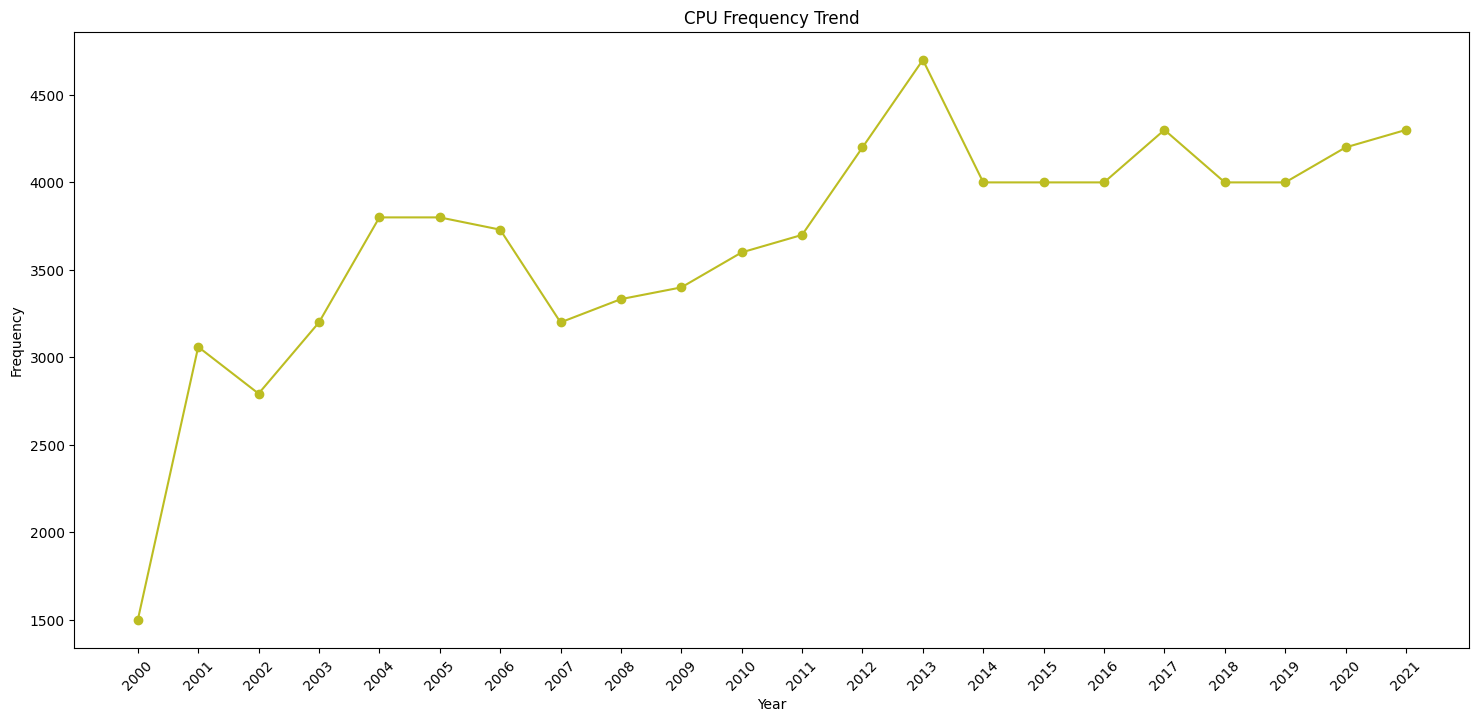

In [230]:
import matplotlib.pyplot as plt

plt.figure(figsize=(18, 8))
plt.plot(df_f['Year'], df_f['Frequency'], marker='o', linestyle='-', color = '#bcbd22')
plt.xticks(df_f['Year'], rotation=45)
plt.title('CPU Frequency Trend')
plt.xlabel('Year')
plt.ylabel('Frequency')
plt.show()

# DATA INSIGHTS

## GPU

## Ranking in terms of TDP

In [329]:
df_tdp= df_w[['Type', 'Product','TDP']].where(df_w['Type'] == 'GPU').dropna()
df_tdp

,Type,Product,TDP
2192,GPU,Intel Xeon E3-1275,95.000000
2193,GPU,Matrox Parhelia 128 MB,81.359981
2194,GPU,NVIDIA GeForce MX150 GP107,25.000000
2195,GPU,Intel GMA 500,81.359981
2196,GPU,ATI Radeon HD 4350 AGP,20.000000
...,...,...,...
4849,GPU,NVIDIA Quadro 3000M,75.000000
4850,GPU,Intel GMA 950,7.000000
4851,GPU,NVIDIA GeForce GT 320M,23.000000
4852,GPU,NVIDIA GeForce FX 5200,81.359981


In [330]:
type(df_tdp)

pandas.core.frame.DataFrame

In [337]:
df_tdp = df_tdp.sort_values(by='TDP', ascending=False)
df_tdp


,Type,Product,TDP
4821,GPU,NVIDIA Tesla S2050,900.0
3603,GPU,NVIDIA Tesla S1070,800.0
4064,GPU,NVIDIA Tesla S870,800.0
2908,GPU,NVIDIA Tesla S1075,800.0
2522,GPU,NVIDIA Quadro Plex 2100 D4,640.0
4420,GPU,NVIDIA Quadro Plex 1000 Model II,640.0
4605,GPU,NVIDIA Quadro Plex 2100 S4,640.0
4735,GPU,NVIDIA Quadro Plex 2200 D2,640.0
2790,GPU,NVIDIA Quadro Plex 2200 S4,600.0
3788,GPU,NVIDIA Quadro Plex 7000,600.0


In [338]:
df_tdp = df_tdp.head(10)
df_tdp

,Type,Product,TDP
4821,GPU,NVIDIA Tesla S2050,900.0
3603,GPU,NVIDIA Tesla S1070,800.0
4064,GPU,NVIDIA Tesla S870,800.0
2908,GPU,NVIDIA Tesla S1075,800.0
2522,GPU,NVIDIA Quadro Plex 2100 D4,640.0
4420,GPU,NVIDIA Quadro Plex 1000 Model II,640.0
4605,GPU,NVIDIA Quadro Plex 2100 S4,640.0
4735,GPU,NVIDIA Quadro Plex 2200 D2,640.0
2790,GPU,NVIDIA Quadro Plex 2200 S4,600.0
3788,GPU,NVIDIA Quadro Plex 7000,600.0


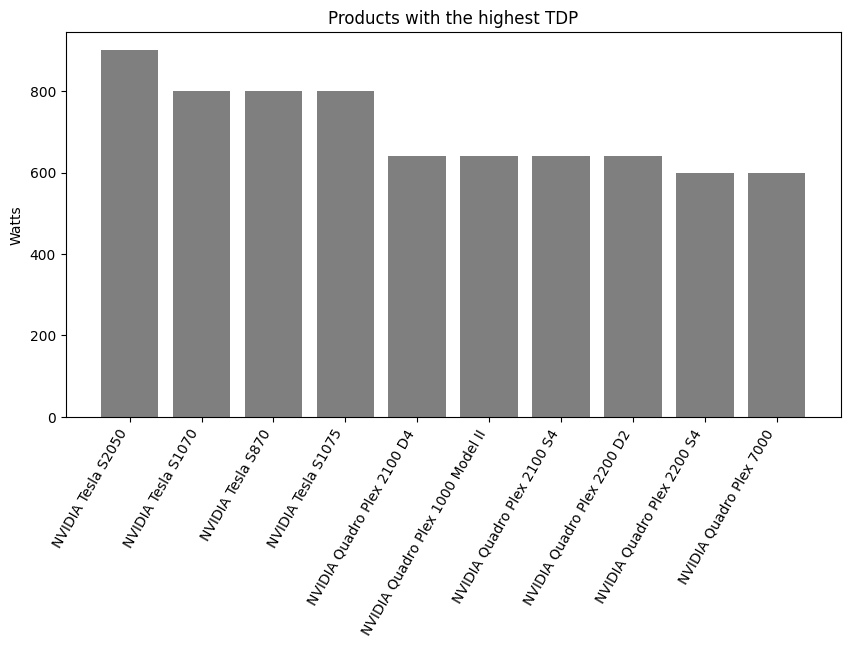

In [339]:
plt.figure(figsize=(10,5))
plt.bar(df_tdp['Product'], df_tdp['TDP'], color = '#7f7f7f')
plt.title('Products with the highest TDP')
plt.ylabel('Watts')
plt.xticks(rotation=60, ha='right')
plt.show()

## Ranking in terms of Process Size

In [238]:
df_tdp= df_w[['Type', 'Product','Process_Size']].where(df_w['Type'] == 'GPU').dropna()
df_tdp

,Type,Product,Process_Size
2192,GPU,Intel Xeon E3-1275,32.0
2193,GPU,Matrox Parhelia 128 MB,150.0
2194,GPU,NVIDIA GeForce MX150 GP107,14.0
2195,GPU,Intel GMA 500,130.0
2196,GPU,ATI Radeon HD 4350 AGP,55.0
...,...,...,...
4849,GPU,NVIDIA Quadro 3000M,40.0
4850,GPU,Intel GMA 950,90.0
4851,GPU,NVIDIA GeForce GT 320M,40.0
4852,GPU,NVIDIA GeForce FX 5200,150.0


In [239]:
type(df_tdp)

pandas.core.frame.DataFrame

In [241]:
df_tdp = df_tdp.sort_values(by='Process_Size')
df_tdp


,Type,Product,Process_Size
3402,GPU,Matrox QID PRO,0.0
3882,GPU,Matrox QID,0.0
2239,GPU,Matrox QID LP PCIe,0.0
4249,GPU,Matrox QID LP PCI,0.0
2588,GPU,AMD Radeon Vega 8 Mobile,7.0
...,...,...,...
4357,GPU,NVIDIA Vanta LT,250.0
2466,GPU,3dfx Voodoo5 5500 PCI,250.0
3074,GPU,Sony Playstation 2 GPU 250nm,250.0
4231,GPU,3dfx Voodoo5 5000 AGP,250.0


In [242]:
df_tdp = df_tdp.head(10)
df_tdp

,Type,Product,Process_Size
3402,GPU,Matrox QID PRO,0.0
3882,GPU,Matrox QID,0.0
2239,GPU,Matrox QID LP PCIe,0.0
4249,GPU,Matrox QID LP PCI,0.0
2588,GPU,AMD Radeon Vega 8 Mobile,7.0
4338,GPU,AMD Radeon Pro W5700,7.0
2602,GPU,AMD Radeon Graphics 384SP,7.0
3643,GPU,AMD Radeon Pro W5700X,7.0
2614,GPU,AMD Radeon Pro V520,7.0
4175,GPU,AMD Xbox Series S GPU,7.0


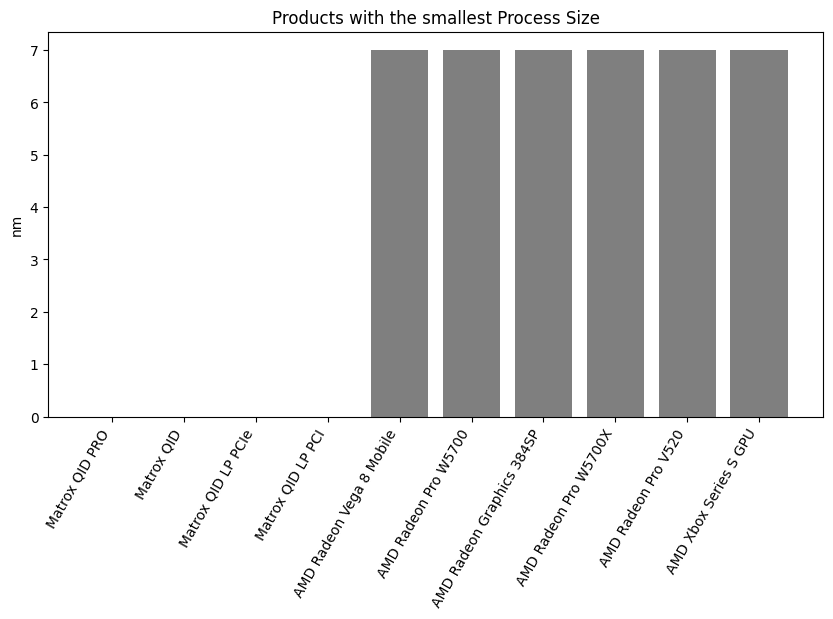

In [243]:
plt.figure(figsize=(10,5))
plt.bar(df_tdp['Product'], df_tdp['Process_Size'], color = '#7f7f7f')
plt.title('Products with the smallest Process Size')
plt.ylabel('nm')
plt.xticks(rotation=60, ha='right')
plt.show()

In [244]:
df_tdp= df_w[['Type', 'Product','Process_Size']].where(df_w['Type'] == 'GPU').dropna()
df_tdp

,Type,Product,Process_Size
2192,GPU,Intel Xeon E3-1275,32.0
2193,GPU,Matrox Parhelia 128 MB,150.0
2194,GPU,NVIDIA GeForce MX150 GP107,14.0
2195,GPU,Intel GMA 500,130.0
2196,GPU,ATI Radeon HD 4350 AGP,55.0
...,...,...,...
4849,GPU,NVIDIA Quadro 3000M,40.0
4850,GPU,Intel GMA 950,90.0
4851,GPU,NVIDIA GeForce GT 320M,40.0
4852,GPU,NVIDIA GeForce FX 5200,150.0


In [245]:
type(df_tdp)

pandas.core.frame.DataFrame

In [246]:
df_tdp = df_tdp.sort_values(by='Process_Size', ascending=False)
df_tdp

,Type,Product,Process_Size
4231,GPU,3dfx Voodoo5 5000 AGP,250.0
3502,GPU,3dfx Voodoo4 4500 PCI,250.0
2529,GPU,3dfx Voodoo4 4000 AGP,250.0
3074,GPU,Sony Playstation 2 GPU 250nm,250.0
2466,GPU,3dfx Voodoo5 5500 PCI,250.0
...,...,...,...
3156,GPU,NVIDIA GRID A100B,7.0
3402,GPU,Matrox QID PRO,0.0
4249,GPU,Matrox QID LP PCI,0.0
2239,GPU,Matrox QID LP PCIe,0.0


In [247]:
df_tdp = df_tdp.head(10)
df_tdp

,Type,Product,Process_Size
4231,GPU,3dfx Voodoo5 5000 AGP,250.0
3502,GPU,3dfx Voodoo4 4500 PCI,250.0
2529,GPU,3dfx Voodoo4 4000 AGP,250.0
3074,GPU,Sony Playstation 2 GPU 250nm,250.0
2466,GPU,3dfx Voodoo5 5500 PCI,250.0
3831,GPU,3dfx Voodoo4 4800 AGP,250.0
4640,GPU,3dfx Voodoo5 6000,250.0
3733,GPU,3dfx Voodoo5 5000 PCI,250.0
4279,GPU,3dfx Voodoo5 5500 AGP,250.0
4187,GPU,3dfx Voodoo4 4500 AGP,250.0


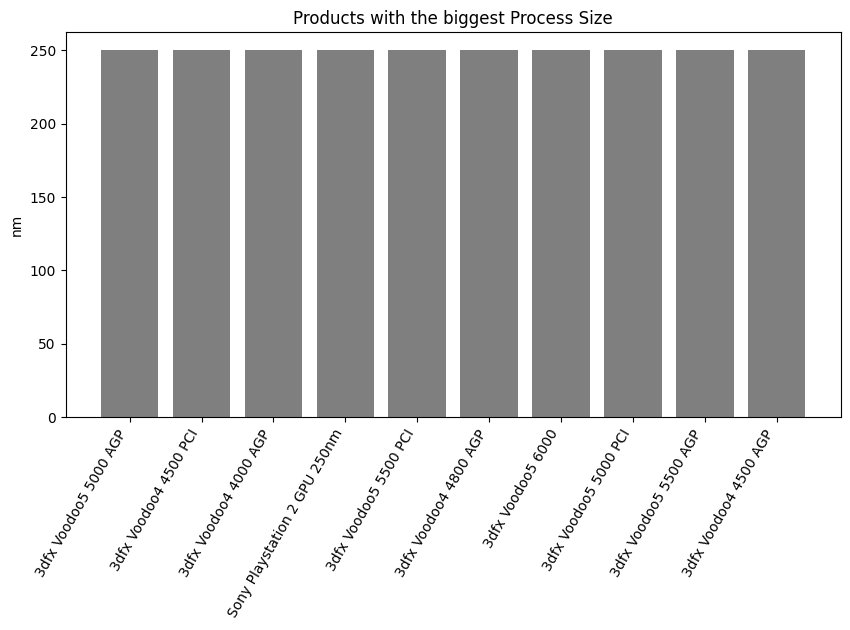

In [249]:
plt.figure(figsize=(10,5))
plt.bar(df_tdp['Product'], df_tdp['Process_Size'], color = '#7f7f7f')
plt.title('Products with the biggest Process Size')
plt.ylabel('nm')
plt.xticks(rotation=60, ha='right')
plt.show()

## Ranking in terms of Die Size

In [250]:
df_d= df_w[['Type', 'Product','Die_Size']].where(df_w['Type'] == 'GPU').dropna()
df_d

,Type,Product,Die_Size
2192,GPU,Intel Xeon E3-1275,216.000000
2193,GPU,Matrox Parhelia 128 MB,174.000000
2194,GPU,NVIDIA GeForce MX150 GP107,132.000000
2195,GPU,Intel GMA 500,188.440445
2196,GPU,ATI Radeon HD 4350 AGP,73.000000
...,...,...,...
4849,GPU,NVIDIA Quadro 3000M,332.000000
4850,GPU,Intel GMA 950,188.440445
4851,GPU,NVIDIA GeForce GT 320M,100.000000
4852,GPU,NVIDIA GeForce FX 5200,65.000000


In [251]:
type(df_tdp)

pandas.core.frame.DataFrame

In [252]:
df_tdp = df_tdp.sort_values(by='Process_Size', ascending=False)
df_tdp

,Type,Product,Process_Size
4231,GPU,3dfx Voodoo5 5000 AGP,250.0
3502,GPU,3dfx Voodoo4 4500 PCI,250.0
2529,GPU,3dfx Voodoo4 4000 AGP,250.0
3074,GPU,Sony Playstation 2 GPU 250nm,250.0
2466,GPU,3dfx Voodoo5 5500 PCI,250.0
3831,GPU,3dfx Voodoo4 4800 AGP,250.0
4640,GPU,3dfx Voodoo5 6000,250.0
3733,GPU,3dfx Voodoo5 5000 PCI,250.0
4279,GPU,3dfx Voodoo5 5500 AGP,250.0
4187,GPU,3dfx Voodoo4 4500 AGP,250.0


In [253]:
df_tdp = df_tdp.head(10)
df_tdp

,Type,Product,Process_Size
4231,GPU,3dfx Voodoo5 5000 AGP,250.0
3502,GPU,3dfx Voodoo4 4500 PCI,250.0
2529,GPU,3dfx Voodoo4 4000 AGP,250.0
3074,GPU,Sony Playstation 2 GPU 250nm,250.0
2466,GPU,3dfx Voodoo5 5500 PCI,250.0
3831,GPU,3dfx Voodoo4 4800 AGP,250.0
4640,GPU,3dfx Voodoo5 6000,250.0
3733,GPU,3dfx Voodoo5 5000 PCI,250.0
4279,GPU,3dfx Voodoo5 5500 AGP,250.0
4187,GPU,3dfx Voodoo4 4500 AGP,250.0


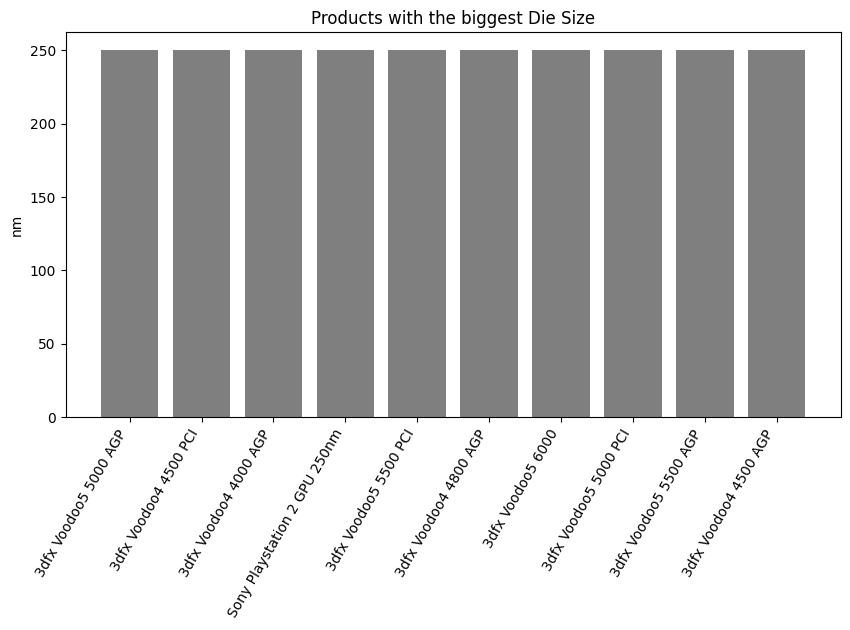

In [254]:
plt.figure(figsize=(10,5))
plt.bar(df_tdp['Product'], df_tdp['Process_Size'], color = '#7f7f7f')
plt.title('Products with the biggest Die Size')
plt.ylabel('nm')
plt.xticks(rotation=60, ha='right')
plt.show()

## Ranking in terms of Transistors

In [255]:
df_tr= df_w[['Type', 'Product','Transistors']].where(df_w['Type'] == 'GPU').dropna()
df_tr

,Type,Product,Transistors
2192,GPU,Intel Xeon E3-1275,1160.000000
2193,GPU,Matrox Parhelia 128 MB,80.000000
2194,GPU,NVIDIA GeForce MX150 GP107,3300.000000
2195,GPU,Intel GMA 500,1929.922279
2196,GPU,ATI Radeon HD 4350 AGP,242.000000
...,...,...,...
4849,GPU,NVIDIA Quadro 3000M,1950.000000
4850,GPU,Intel GMA 950,1929.922279
4851,GPU,NVIDIA GeForce GT 320M,486.000000
4852,GPU,NVIDIA GeForce FX 5200,29.000000


In [256]:
type(df_tr)

pandas.core.frame.DataFrame

In [259]:
df_tr = df_tr.sort_values(by='Transistors', ascending=False)
df_tr

,Type,Product,Transistors
3911,GPU,NVIDIA A100 PCIe,54200.0
2487,GPU,NVIDIA PG506-232,54200.0
2942,GPU,NVIDIA GRID A100A,54200.0
3134,GPU,NVIDIA A100 SXM4 40 GB,54200.0
2674,GPU,NVIDIA A100 SXM4 80 GB,54200.0
...,...,...,...
4845,GPU,NVIDIA Tegra 3 GPU,10.0
2794,GPU,Matrox Millennium G550 PCIe,10.0
4185,GPU,Matrox Millennium G550,10.0
2662,GPU,Matrox Millennium G450 x2 MMS,10.0


In [303]:
df_tr = df_tr.head(10)
df_tr

,Type,Product,Transistors
3911,GPU,NVIDIA A100 PCIe,54200.0
2487,GPU,NVIDIA PG506-232,54200.0
2942,GPU,NVIDIA GRID A100A,54200.0
3134,GPU,NVIDIA A100 SXM4 40 GB,54200.0
2674,GPU,NVIDIA A100 SXM4 80 GB,54200.0
3156,GPU,NVIDIA GRID A100B,54200.0
4450,GPU,NVIDIA A30 PCIe,54200.0
3801,GPU,AMD Radeon Instinct MI100,50000.0
3030,GPU,NVIDIA GeForce RTX 3090,28300.0
3876,GPU,NVIDIA A10G,28300.0


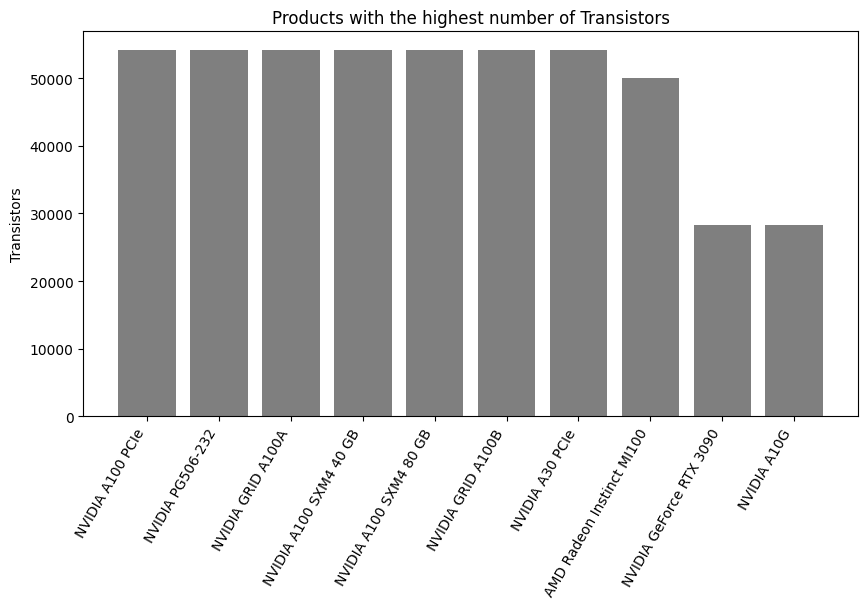

In [304]:
plt.figure(figsize=(10,5))
plt.bar(df_tr['Product'], df_tr['Transistors'], color = '#7f7f7f')
plt.title('Products with the highest number of Transistors')
plt.ylabel('Transistors')
plt.xticks(rotation=60, ha='right')
plt.show()

## Ranking in terms of Frequency

In [269]:
df_fr= df_w[['Type', 'Product','Frequency']].where(df_w['Type'] == 'GPU').dropna()
df_fr

,Type,Product,Frequency
2192,GPU,Intel Xeon E3-1275,100.0
2193,GPU,Matrox Parhelia 128 MB,200.0
2194,GPU,NVIDIA GeForce MX150 GP107,1469.0
2195,GPU,Intel GMA 500,200.0
2196,GPU,ATI Radeon HD 4350 AGP,600.0
...,...,...,...
4849,GPU,NVIDIA Quadro 3000M,450.0
4850,GPU,Intel GMA 950,250.0
4851,GPU,NVIDIA GeForce GT 320M,500.0
4852,GPU,NVIDIA GeForce FX 5200,250.0


In [270]:
type(df_fr)

pandas.core.frame.DataFrame

In [271]:
df_fr = df_fr.sort_values(by='Frequency', ascending=False)
df_fr

,Type,Product,Frequency
4015,GPU,AMD Radeon RX 6800M,2321.0
3013,GPU,AMD Radeon RX 6700 XT,2321.0
4381,GPU,AMD Playstation 5 GPU,2233.0
3215,GPU,AMD Xbox Series X GPU,1825.0
3003,GPU,AMD Radeon RX 6800 XT,1825.0
...,...,...,...
3164,GPU,ATI Fire GL2,120.0
4357,GPU,NVIDIA Vanta LT,105.0
3507,GPU,Intel i830MG Graphics,100.0
4360,GPU,Intel HD Graphics,100.0


In [273]:
df_fr = df_fr.head(10)
df_fr

,Type,Product,Frequency
4015,GPU,AMD Radeon RX 6800M,2321.0
3013,GPU,AMD Radeon RX 6700 XT,2321.0
4381,GPU,AMD Playstation 5 GPU,2233.0
3215,GPU,AMD Xbox Series X GPU,1825.0
3003,GPU,AMD Radeon RX 6800 XT,1825.0
3843,GPU,AMD Radeon RX 6900 XT,1825.0
4178,GPU,AMD Radeon Pro W5500,1744.0
2204,GPU,AMD Radeon RX 6800,1700.0
4443,GPU,AMD Radeon RX 5700 XT 50th Anniversary,1680.0
3370,GPU,AMD Radeon RX 5300 XT,1670.0


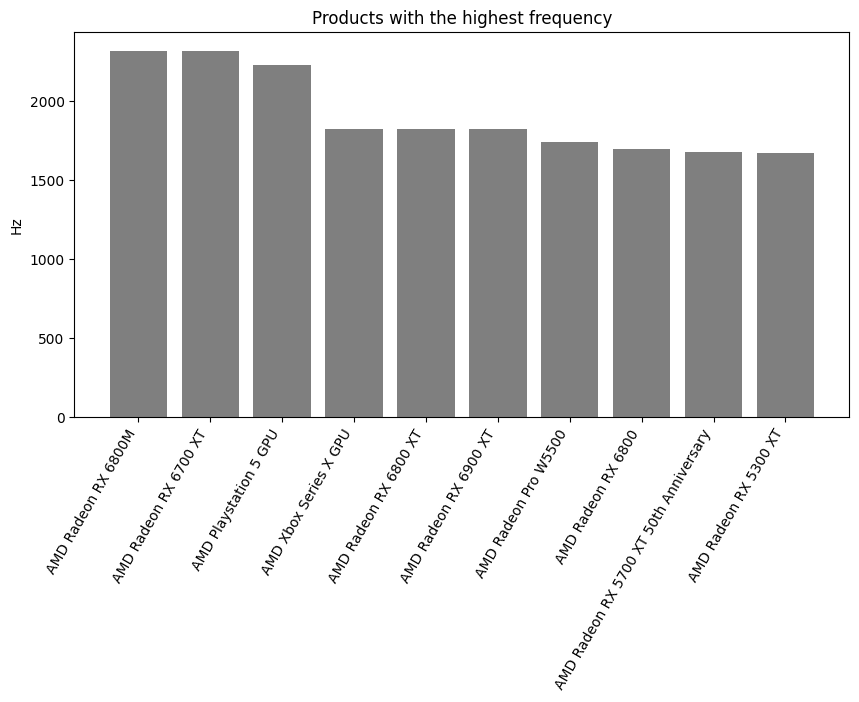

In [301]:
plt.figure(figsize=(10,5))
plt.bar(df_fr['Product'], df_fr['Frequency'], color = '#7f7f7f')
plt.title('Products with the highest frequency')
plt.ylabel('Hz')
plt.xticks(rotation=60, ha='right')
plt.show()

## GPU

## Ranking in terms of TDP

In [276]:
df_tdp= df_w[['Type', 'Product','TDP']].where(df_w['Type'] == 'CPU').dropna()
df_tdp

,Type,Product,TDP
0,CPU,AMD Athlon 64 3500+,45.0
1,CPU,AMD Athlon 200GE,35.0
2,CPU,Intel Core i5-1145G7,28.0
3,CPU,Intel Xeon E5-2603 v2,80.0
4,CPU,AMD Phenom II X4 980 BE,125.0
...,...,...,...
2187,CPU,Intel Xeon Gold 6312U,185.0
2188,CPU,AMD Ryzen 9 4900H,54.0
2189,CPU,Intel Core 2 Duo E6550,65.0
2190,CPU,AMD Opteron 246,85.0


In [277]:
type(df_fr)

pandas.core.frame.DataFrame

In [279]:
df_tdp = df_tdp.sort_values(by='TDP', ascending=False)
df_tdp

,Type,Product,TDP
1184,CPU,Intel Xeon Platinum 9282,400.0
2026,CPU,Intel Core i9-10990XE,380.0
1275,CPU,Intel Xeon Platinum 9242,350.0
535,CPU,Intel Xeon Phi 7295,320.0
1885,CPU,Intel Xeon Phi 3120P,300.0
...,...,...,...
2175,CPU,Intel Atom Z612,1.0
60,CPU,Intel Atom Z515,1.0
1964,CPU,Intel Atom Z600,1.0
469,CPU,Intel Atom Z620,1.0


In [280]:
df_tdp = df_tdp.head(10)
df_tdp

,Type,Product,TDP
1184,CPU,Intel Xeon Platinum 9282,400.0
2026,CPU,Intel Core i9-10990XE,380.0
1275,CPU,Intel Xeon Platinum 9242,350.0
535,CPU,Intel Xeon Phi 7295,320.0
1885,CPU,Intel Xeon Phi 3120P,300.0
150,CPU,Intel Xeon Phi 7110P,300.0
1640,CPU,Intel Xeon Phi 3120A,300.0
1106,CPU,Intel Xeon Phi 7110X,300.0
55,CPU,Intel Xeon Phi 7120X,300.0
1847,CPU,Intel Aubrey Isle,300.0


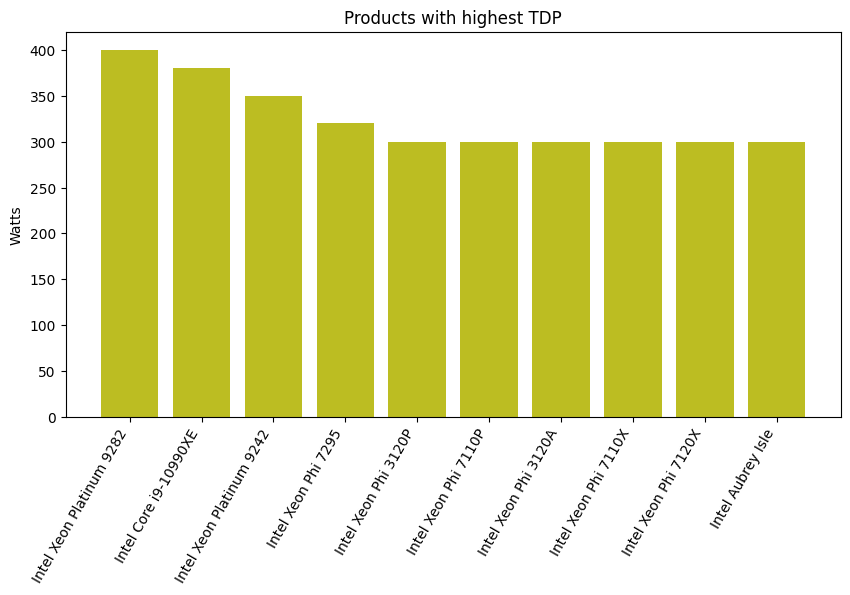

In [283]:
plt.figure(figsize=(10,5))
plt.bar(df_tdp['Product'], df_tdp['TDP'], color = '#bcbd22')
plt.title('Products with highest TDP')
plt.ylabel('Watts')
plt.xticks(rotation=60, ha='right')
plt.show()

## Ranking in terms of Die Size

In [284]:
df_ds= df_w[['Type', 'Product','Die_Size']].where(df_w['Type'] == 'CPU').dropna()
df_ds

,Type,Product,Die_Size
0,CPU,AMD Athlon 64 3500+,77.000000
1,CPU,AMD Athlon 200GE,192.000000
2,CPU,Intel Core i5-1145G7,188.440445
3,CPU,Intel Xeon E5-2603 v2,160.000000
4,CPU,AMD Phenom II X4 980 BE,258.000000
...,...,...,...
2187,CPU,Intel Xeon Gold 6312U,188.440445
2188,CPU,AMD Ryzen 9 4900H,156.000000
2189,CPU,Intel Core 2 Duo E6550,143.000000
2190,CPU,AMD Opteron 246,188.440445


In [286]:
df_ds = df_ds.sort_values(by='Die_Size', ascending=False)
df_ds

,Type,Product,Die_Size
1847,CPU,Intel Aubrey Isle,684.0
305,CPU,Intel Xeon E7-8870,513.0
559,CPU,Intel Xeon E7-8860,513.0
1190,CPU,Intel Xeon E7-8850,513.0
1094,CPU,Intel Xeon 7120N,435.0
...,...,...,...
610,CPU,AMD Athlon 64 LE-1600,3.0
280,CPU,AMD Athlon 64 LE-1640,3.0
888,CPU,AMD Athlon 64 3800+ (F3),1.0
1410,CPU,AMD Athlon 64 3500+ (F3),1.0


In [287]:
df_ds = df_ds.head(10)
df_ds

,Type,Product,Die_Size
1847,CPU,Intel Aubrey Isle,684.0
305,CPU,Intel Xeon E7-8870,513.0
559,CPU,Intel Xeon E7-8860,513.0
1190,CPU,Intel Xeon E7-8850,513.0
1094,CPU,Intel Xeon 7120N,435.0
388,CPU,Intel Xeon 7130M,435.0
1263,CPU,Intel Xeon 7120M,435.0
480,CPU,Intel Xeon 7110M,435.0
467,CPU,Intel Xeon 7140M,435.0
1411,CPU,Intel Xeon 7140N,435.0


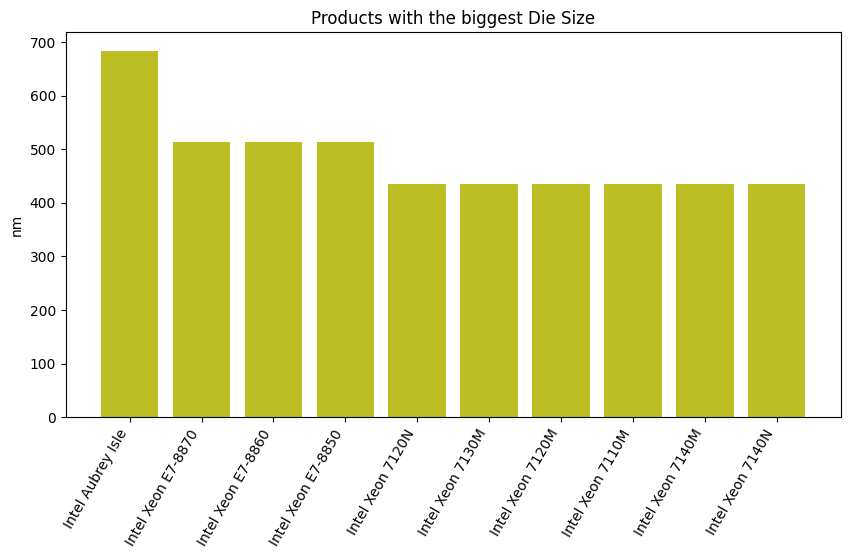

In [300]:
plt.figure(figsize=(10,5))
plt.bar(df_ds['Product'], df_ds['Die_Size'], color = '#bcbd22')
plt.title('Products with the biggest Die Size')
plt.ylabel('nm')
plt.xticks(rotation=60, ha='right')
plt.show()

## Ranking in terms of Transistors

In [291]:
df_ts= df_w[['Type', 'Product','Transistors']].where(df_w['Type'] == 'CPU').dropna()
df_ts

,Type,Product,Transistors
0,CPU,AMD Athlon 64 3500+,122.000000
1,CPU,AMD Athlon 200GE,4800.000000
2,CPU,Intel Core i5-1145G7,1929.922279
3,CPU,Intel Xeon E5-2603 v2,1400.000000
4,CPU,AMD Phenom II X4 980 BE,758.000000
...,...,...,...
2187,CPU,Intel Xeon Gold 6312U,1929.922279
2188,CPU,AMD Ryzen 9 4900H,9800.000000
2189,CPU,Intel Core 2 Duo E6550,291.000000
2190,CPU,AMD Opteron 246,106.000000


In [294]:
df_ts = df_ts.sort_values(by='Transistors', ascending=False)
df_ts

,Type,Product,Transistors
133,CPU,AMD Ryzen Threadripper 2970WX,19200.0
1536,CPU,AMD Ryzen Threadripper 2920X,19200.0
1998,CPU,AMD Ryzen Threadripper 2950X,19200.0
808,CPU,AMD Ryzen Threadripper 2990WX,19200.0
132,CPU,AMD Ryzen 5 4600U,9800.0
...,...,...,...
1310,CPU,AMD Sempron 2600+,37.0
1056,CPU,AMD Athlon 850,37.0
170,CPU,AMD Athlon 700,37.0
570,CPU,AMD Sempron 2200+,37.0


In [296]:
df_ts = df_ts.head(10)
df_ts

,Type,Product,Transistors
133,CPU,AMD Ryzen Threadripper 2970WX,19200.0
1536,CPU,AMD Ryzen Threadripper 2920X,19200.0
1998,CPU,AMD Ryzen Threadripper 2950X,19200.0
808,CPU,AMD Ryzen Threadripper 2990WX,19200.0
132,CPU,AMD Ryzen 5 4600U,9800.0
1773,CPU,AMD Ryzen 7 4800HS,9800.0
2033,CPU,AMD Ryzen 5 4500U,9800.0
1459,CPU,AMD Ryzen 3 4300U,9800.0
64,CPU,AMD Ryzen 9 5900HX,9800.0
2188,CPU,AMD Ryzen 9 4900H,9800.0


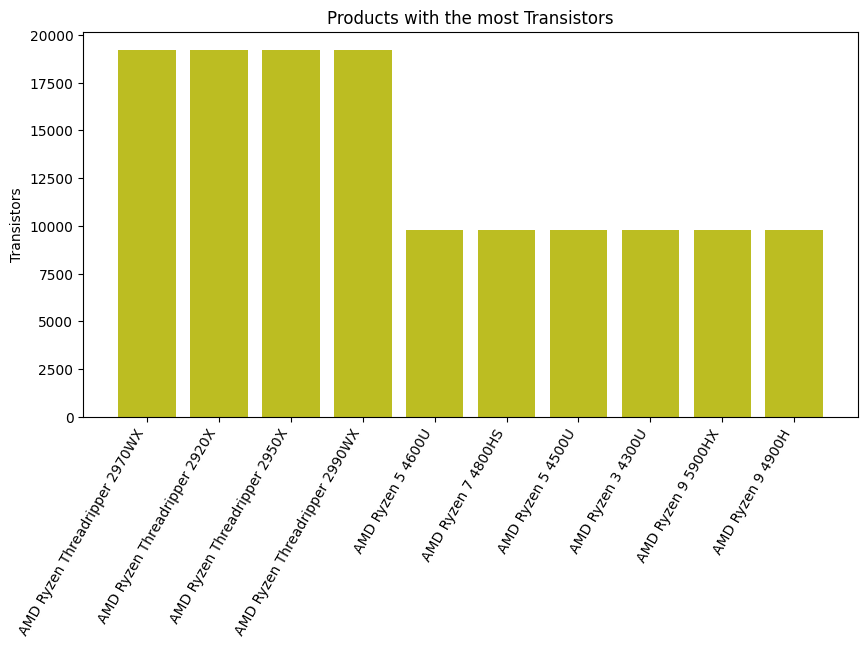

In [299]:
plt.figure(figsize=(10,5))
plt.bar(df_ts['Product'], df_ts['Transistors'], color = '#bcbd22')
plt.title('Products with the most Transistors')
plt.ylabel('Transistors')
plt.xticks(rotation=60, ha='right')
plt.show()

## Ranking in terms of Frequency

In [305]:
df_fq= df_w[['Type', 'Product','Frequency']].where(df_w['Type'] == 'CPU').dropna()
df_fq

,Type,Product,Frequency
0,CPU,AMD Athlon 64 3500+,2200.0
1,CPU,AMD Athlon 200GE,3200.0
2,CPU,Intel Core i5-1145G7,2600.0
3,CPU,Intel Xeon E5-2603 v2,1800.0
4,CPU,AMD Phenom II X4 980 BE,3700.0
...,...,...,...
2187,CPU,Intel Xeon Gold 6312U,2400.0
2188,CPU,AMD Ryzen 9 4900H,3300.0
2189,CPU,Intel Core 2 Duo E6550,2333.0
2190,CPU,AMD Opteron 246,2000.0


In [306]:
df_fq = df_fq.sort_values(by='Frequency', ascending=False)
df_fq

,Type,Product,Frequency
225,CPU,AMD FX-9590,4700.0
727,CPU,AMD FX-9370,4400.0
1115,CPU,Intel Pentium Gold G6605,4300.0
1472,CPU,Intel Core i3-7360X,4300.0
237,CPU,Intel Core i7-7740X,4300.0
...,...,...,...
1731,CPU,Intel Atom E625CT,600.0
264,CPU,Intel A100,600.0
836,CPU,Intel Atom E620,600.0
1495,CPU,Intel Atom E625C,600.0


In [308]:
df_fq = df_fq.head(10)
df_fq

,Type,Product,Frequency
225,CPU,AMD FX-9590,4700.0
727,CPU,AMD FX-9370,4400.0
1115,CPU,Intel Pentium Gold G6605,4300.0
1472,CPU,Intel Core i3-7360X,4300.0
237,CPU,Intel Core i7-7740X,4300.0
1042,CPU,AMD FX-4350,4200.0
313,CPU,Intel Core i3-7350K,4200.0
2153,CPU,Intel Pentium Gold G6505,4200.0
1542,CPU,Intel Pentium Gold G6600,4200.0
889,CPU,Intel Core i3-7340,4200.0


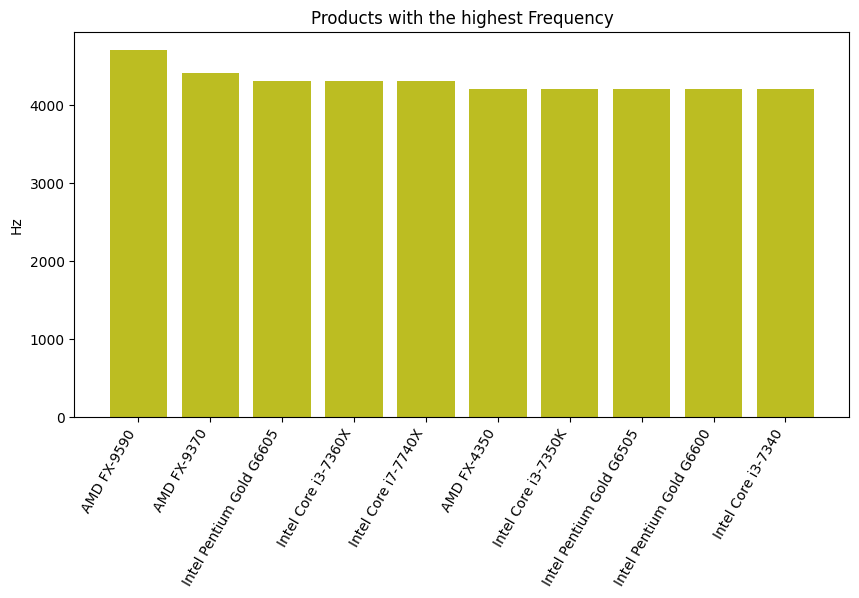

In [310]:
plt.figure(figsize=(10,5))
plt.bar(df_fq['Product'], df_fq['Frequency'], color = '#bcbd22')
plt.title('Products with the highest Frequency')
plt.ylabel('Hz')
plt.xticks(rotation=60, ha='right')
plt.show()